<h1>MALIS Lab Session 1 - Fall 2018</h1>

The aim of this lab is to practice with Neural Networks (Multi-Layer Perceptrons) via simple classification experiments and the (partial) implementation of the feedforward and backpropagation procedures. For this lab, the implementation of the MLP simulator is in Python 3.

Experiments should be made by groups of two students. Each group should produce a Jupyter Notebook with all their results and comments. We strongly encourage the addition of plots and visual representation to the report, bearing in mind that comments on the graphical data are still necessary. Code for adding images to your notebook: ```<img src="path/to/image.png" />```.

Submit your complete notebook as an archive (tar -cf groupXnotebook.tar lab1/) . Deadline for submitting your notebook: 30 November 2018.

<h2>Introduction</h2>
There are three parts to this lab session. 

1. A "theoretical" part: Given a set of training examples you have to decide on the architecture of the feed-forward neural network such as; number of layers, number of neuron per layers and finally the values of the weights. 

2. A "programming" part: Given the skeleton of the Python code of an MLP simulator, implement the missing functions (feedforward and backpropagation procedures). 

3. An "experimental" part: Having completed the implementation of the MLP simulator, the final step consist on training the network and testing its accuracy.

<h2>Part 1: Design a neural network</h2>
The aim of this part is to get a better understanding of the basics of Neural Networks construction. A number of sample points on a 128 by 128 grid have been assigned one out of three colors (red, green or blue). You should build a Neural Network with two inputs and three outputs which provides the exact coloring for these points. The problem can be visualized in the following figure: 

<img src="data_set.jpg" />

The file set30.x1x2rgb (in .\data\) contains the data corresponding to the problem defined above. The visual representation of the problem (above figure) is stored in data_set.jpg.

The problem:

Pairs of x1 and x2 coordinates (both ranging between 0 and 127) are associated with a specific color: 

* Red: output 1 0 0, 
* Green: output 0 1 0, 
* Blue: output 0 0 1. 

The objective of the network is to correctly determine for any given (x1, x2) coordinate pair the corresponding color. 
Your task is to <b>manually define a Neural Network which performs this task perfectly (do not forget to justify your answer)</b>. There is no need for programming or iterative training. The transfer function is assumed to be the step function: 

$f(t) = (t > 0)$ (it is equal to 1 if t is positive, 0 otherwise). 

Of course, it is your task to define the number of layers, the number of neurons per layer, and the exact values for the weights. 

<i>Hint: You may remember the XOR problem and how it was solved.</i>

<h3>Your answer:</h3>

Here the data are linearly separable, so we can define classifiers without any errors. <br/>

For the design of the neural network, we need :<br/>
       -<b>2 input neurons</b> because for each point we have exactly <b>2 coordinates</b><br/>
       -<b>3 output neurons</b> because we have <b>3 different outputs</b> (red,green,blue)<br/>
       -<b>1 hidden layer of 2 neurons</b> because it is a <b>linearly separable case</b>, and each neuron represent an <b>hyperplane</b>.<br/>

The hidden layer represents the classifiers. The outputs of the hidden layer are 0 or 1 for each neuron. <br/>
The output layer represents logical functions, determined thanks to a chart of truth. Indeed, the combination of the output of the hidden layer allows to determine the color for each point.

<img src="classifier.png" />
<img src="table.png" />


<h2>Part 2: Implementation of the MLP simulator</h2>
The task here is to implement the missing parts of a code written to simulate multi-layer perceptrons. The code can be found in your directory under the filename utils.py (but you will not edit that file, all your code will be written in your notebook). Here is a brief explanation about the MLP simulator: 

A network description file has to be provided. This is a text file which contains information about the number of layers in the network and the number of units (neuron) for each layer. Here is an example of such a file: 

This example describes a 2 layer network with 2 hidden units and 3 output units. 
Additionally a pattern (or example set) file has to be provided. This file contains a number of example pattern with input and output values. For an example of such a file look at ./data/set30.x1x2rgb.

As you know, transfer functions of an MLP need to be differentiable to train it. Therefore, we replace the step function by a sigmoid function.

Now that you have a broad overview of the program your task is to <b>implement the feedforward function of the Neuron class</b>. Obviously, you can find help in the notes from the course.

In [2]:
# First run this cell to import relevant classes and functions
from utils import Neuron, Dataset, Layer, MLP, sigmoid, d_sigmoid

<h3>Your answer:</h3>

In [3]:
#1 neuron contains its inputs and the associated weights
def feedforward(self):   #self is a neuron here
    res = 0. # Contains the weighted sum of the inputs of the neuron
    for i in range(len(self.inputs)):   #go through all the inputs
        res += self.inputs[i]*self.weights[i]### IMPLEMENTATION REQUIRED ### #implements input*weight
    res += self.bias  #add the threshold of the neuron
    self.u = res   #activation of the neuron
    self.out = sigmoid(res)  #output of the neuron

Neuron.feedforward = feedforward

Before implementing the Backpropagation function, <b>write the recursive formula for the partial derivative of the error with respect to the activation (neuron j of layer i) as a function of the weights and partial derivative of the error in layer i+1 from the course material</b>.

<h3>Your answer:</h3>

$$\frac{\partial L}{\partial u^{(i)}_j}=  \sum_k \frac{\partial L}{\partial u^{(i-1)}_k}  * w^{(i-1)}_{jk} *f^{'}{(u^{i}_j)}     $$

i: layer<br/>
j: neuron <br/>
k: input dans j

Now, <b>implement the compute_gradients() and the apply_gradient() functions of the MLP class</b>.

<h3>Your answer:</h3>

In [4]:
def compute_gradients(self):   #self is a Multi-Layer Perceptron, the layers start from layer N to layer 0
    # First compute derivatives for the last layer
    layer = self.layers[-1]  #we focus on the last layer
    for i in range(len(layer)):  #i points to a neuron of the last layer
        # Compute dL/du_i
        neuron = layer.neurons[i]    #neuron is a neuron of the last layer
        o = neuron.out    #output of the neuron
        u = neuron.u      #activation of the neuron
        t = self.gt[i]    #expected output of the neuron of this layer
        neuron.d_u = 2*(o-t)*d_sigmoid(u) ### IMPLEMENTATION REQUIRED ###  #derivate of the activation
        for j in range(len(neuron.weights)):  #j points to an input of neuron, which are the ouptut of neurons from the previous layer
            # Compute dL/dw_ji
            neuron.d_weights[j] = neuron.d_u * neuron.inputs[j] ### IMPLEMENTATION REQUIRED ### #derivate of the weght

    # Then compute derivatives for other layers
    for l in range(2, len(self.layers)):  # l  points to a layer, go back to the beginning of Network
        layer = self.layers[-l]           #layer is the lth layer, startig from the end
        next_layer = self.layers[-l+1]    #next_layer is the layer on the right (not the previous one)
        for i in range(len(layer)):       #i points to the neurons of the layer
            # Compute dL/du_i
            neuron = layer.neurons[i]
            d_u = 0.
            u = neuron.u
            for j in range(len(next_layer)):  #j points to the neuron of  next layer
                next_neuron = next_layer.neurons[j]
                d_u += next_neuron.d_u*next_neuron.weights[i]### IMPLEMENTATION REQUIRED ### #compute sum
            neuron.d_u= d_u *d_sigmoid(u)
            for j in range(len(neuron.weights)):#j points to an input of the layer, output of the previsous layer (which is next layer)
                # Compute dL/dw_ji
                neuron.d_weights[j] = neuron.d_u * neuron.inputs[j] ### IMPLEMENTATION REQUIRED ###

def apply_gradients(self, learning_rate):
    # Change weights according to computed gradients
    for i in range(1, len(self.layers)):  #i points to a layer
        layer = self.layers[i]
        for j in range(1, len(layer)):   #j points to a neuron of the layers
            neuron = layer.neurons[j]
            for k in range(len(neuron.d_weights)):   #k points to the input of the neuron
                neuron.weights[k] -= learning_rate * neuron.d_weights[k]### IMPLEMENTATION REQUIRED ###
            neuron.bias -= learning_rate * neuron.bias ### IMPLEMENTATION REQUIRED ###

MLP.compute_gradients = compute_gradients
MLP.apply_gradients = apply_gradients

<h2>Part 3: Training and Accuracy experiments</h2>

Train the network on the problem stated in Part 1, using the training set set120.x1x2rgb and the following parameters:
* learning rate: 2.0; 
* number of training cycles: 1000

In order to do so you will need to create a network definition file (as described in the introduction) containing the details of the network architecture. 
Evaluate the accuracy using set30.x1x2rgb as the test set (you can use the setdataset() function of the MLP class to change between training and test sets).

Experiment with the learning rate and the number of training cycles. What do you notice?

<h3>Your answer:</h3>

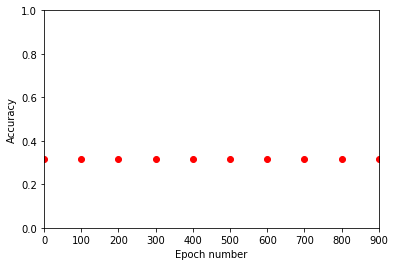

=== Result on test data ===
Accuracy: 33.33333333333333 %


In [24]:
# This is an example code that you can adjust to your liking

train_datafile = "data/set120.x1x2rgb"
train_data = Dataset(train_datafile)

test_datafile = "data/set30.x1x2rgb"
test_data = Dataset(test_datafile)

nnfile = "data/NN.dat"
mlp = MLP(nnfile, train_data, print_step=100, verbose=False)

mlp.train(1000, 1.0)
mlp.make_plot()

print("=== Result on test data ===")
mlp.setdataset(test_data)
mlp.print_accuracy()

<h3>Your comments</h3>
When we increase the number of training cycles to a certain point, the accuracy on test data increases and the accuracy on train data decreases. At that point, the model fits the test data which is good.
However, upon this certain point, the result is very bad on test data : we observe overfitting (the model is too precise for a given sample).
We can note also, when this number is low, the accuracy of the train and test data are pretty similar.

number of training cycles = 1000;learning rate=2.0 
<img src="traindatanbercycles1000.png" />
<img src="testdatanbercycles1000.png" /> 
number of training cycles = 5000;learning rate=2.0 
<img src="traindatanbercycles5000.png" />
<img src="testdatanbercycles5000.png" />
number of training cycles = 10000;learning rate=2.0 
<img src="train10000.png" />
<img src="test10000.png" />

When we decrease the learning rate, we see that the result is better. When the learning rate is low, the result varies (the accuracy can be good 60% or bad 30%). Indeed, the algorithm doesn't have time to reach the minimum point whith a given number of cycles so the result is bad, when it has time, then the result is good. When the learning rate is higher, the results are more stable and quite good. NB : we can't go over 2, maybe because after that point, it's possible that we miss the local minima.

number of training cycles = 1000;learning rate=1.5
<img src="train1.5.png" /> <img src="test1.5.png" />
number of training cycles = 1000;learning rate=1.0 
<img src="trainlr1.png" /> <img src="testlr1.png" />
number of training cycles = 1000;learning rate=0.5 
<img src="trainlr0.5.png" /> <img src="testlr0.5.png" />

To conclude, to have a good result, we need to find the good trade-off (high but not too high) for the number of training cycles and the learning rate.